# Intro to Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Classification

### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # type: ignore
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [45]:
%config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.5.x

1.2.2


In [46]:
iris = datasets.load_iris()

In [47]:
type(iris)

sklearn.utils._bunch.Bunch

In [48]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [49]:
type(iris.data)

numpy.ndarray

In [50]:
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [51]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
features_2d = iris.feature_names[:2]
print(features_2d)

['sepal length (cm)', 'sepal width (cm)']


In [54]:
# Get the 2D feature values
xs_2d = df.loc[:, features_2d].values

ys = iris.target

In [55]:
print(xs_2d.shape)
print(ys.shape)

(150, 2)
(150,)


Note: Expected shapes for features and labels (target values):

![](img/05.02-samples-features.png)

#### Random selection of training (75%) and test sets (25%)

<span style="color:red">Implement your solution below</span>

In [56]:
train_xs, test_xs, train_ys, test_ys = train_test_split(
    xs_2d, ys, test_size=0.25, random_state=1427
)

### Training

<span style="color:red">Implement your solution below</span>

In [ ]:
# 1. Model choice (import)
from sklearn.neighbors import KNeighborsClassifier

# 2. Instantiation
model = KNeighborsClassifier(n_neighbors=3)

# 3. Learn (fit) the model
model.fit(train_xs, train_ys)

# 4. Predict on new data (test)
pred_ys = model.predict(test_xs)
print(pred_ys)
print(test_ys)



[2 1 0 2 0 1 1 0 2 0 1 2 2 2 2 2 0 2 1 1 0 2 2 0 1 1 2 1 1 1 0 1 0 2 0 1 0
 1]
[1 2 0 2 0 1 2 0 2 0 1 2 1 2 2 1 0 1 2 2 0 2 2 0 1 2 1 1 1 1 0 1 0 2 0 1 0
 1]


### Evaluation

[Evaluation_of_binary_classifiers](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics) ([Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision))


$$
\mathrm{ACC}
= \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P} + \mathrm {N}}
= \frac{\mathrm{TP} + \mathrm{TN}}
    {\mathrm{TP} + \mathrm{TN} + \mathrm {FP} +\mathrm {FN}}
$$

<span style="color:red">Implement your solution below</span>

In [58]:
cm = metrics.confusion_matrix(test_ys, pred_ys)
print("Confusion Matrix:\n", cm)
# calculate accuracy from confusion matrix
accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy (from confusion matrix): {accuracy * 100:.2f}%")

accuracy = metrics.accuracy_score(test_ys, pred_ys)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[11  0  0]
 [ 0  9  5]
 [ 0  5  8]]
Accuracy (from confusion matrix): 73.68%
Accuracy: 73.68%


### Plot

In [59]:
def plot_decision_boundary(xs, model, colors=None, num=600):
    try:
        cmap = ListedColormap(colors.values())
    except AttributeError:
        cmap = None

    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, num=num), np.linspace(y_min, y_max, num=num)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx,
        yy,
        zz,
        alpha=0.4,
        cmap=cmap,
        antialiased=True,
    )

In [60]:
def plot_points(xs, ys, ft_names=(None, None), target_names=None, colors=None):
    if target_names is None:
        target_names = {}
    if colors is None:
        colors = {}

    for y_val in set(ys):
        plt.scatter(
            xs[ys == y_val, 0],
            xs[ys == y_val, 1],
            color=colors.get(y_val),
            alpha=0.8,
            label=target_names.get(y_val),
            edgecolor="black",
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("3-Class classification")
    try:
        plt.xlabel(ft_names[0])
        plt.ylabel(ft_names[1])
    except TypeError:
        pass

In [61]:
COLORS = {0: "green", 1: "red", 2: "blue"}

target_names = {k: v for k, v in enumerate(iris.target_names)}
target_names

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

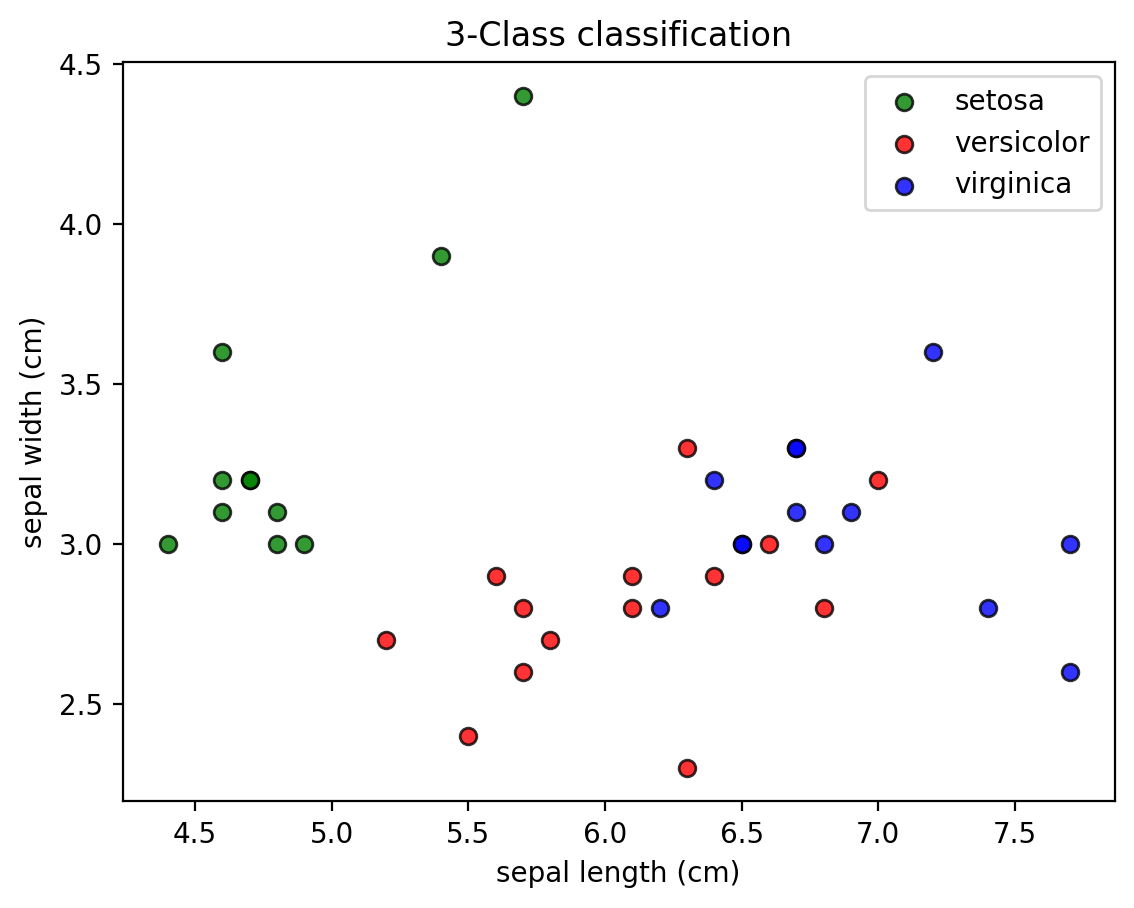

In [62]:
# plot_points(test_xs, test_ys, features_2d, target_names, COLORS)
plot_points(test_xs, test_ys, features_2d, target_names, COLORS)

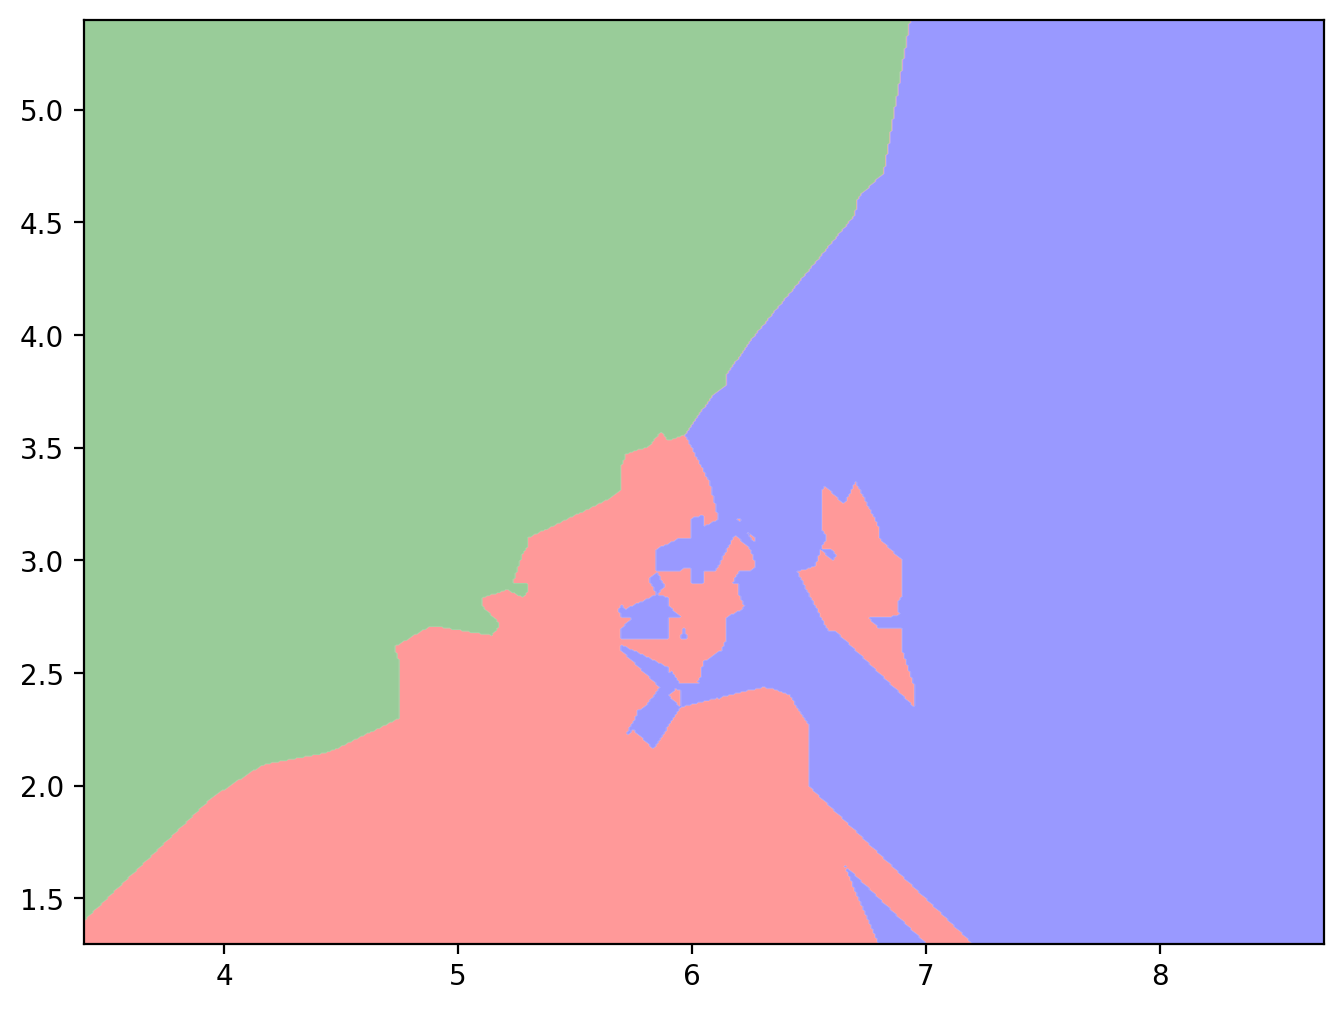

In [63]:
plot_decision_boundary(test_xs, model, COLORS)

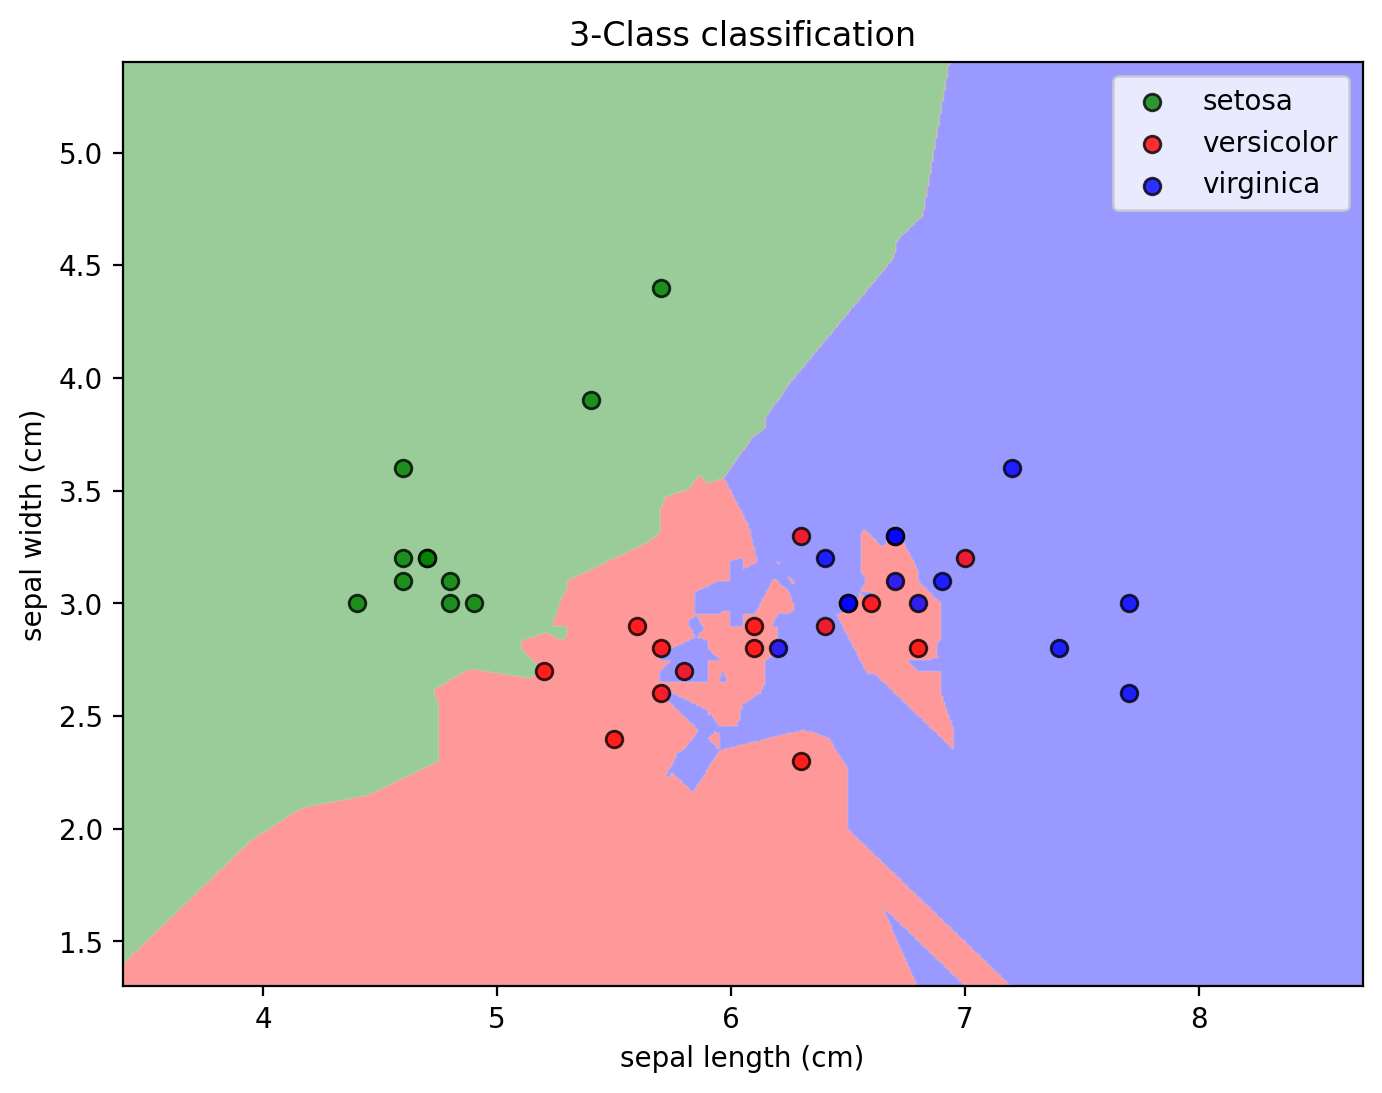

In [64]:
plot_decision_boundary(test_xs, model, COLORS)
plot_points(test_xs, test_ys, features_2d, target_names, COLORS)

## Exercise 1

Find in the [documentation](https://scikit-learn.org/stable/supervised_learning.html) how to apply these other models to this dataset:

* *[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)*
* *[Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)*
* *[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)*
* *[k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)*
* *[Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)*

Write the results in a table and graphically for each system using the `plot_...` [above](#Plot) functions, and give a short analysis comparing the results.

<span style="color:red">Implement your solution below</span>

## Exercise 2

* Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to all descriptors (there are 4) of the Iris dataset

* Give the ratio of the variance explained by each of the selected components, as well as their cumulative sum

* Apply one of the previous classifiers to the first two principal components

* Compare the quality of the predictions between those obtained with the first two principal components and those obtained with the first 2 descriptors (Exercise 1)

<span style="color:red">Implement your solution below</span>

In [65]:
cm = metrics.confusion_matrix(test_ys, pred_ys)
print("Confusion Matrix:\n", cm)
# calculate accuracy from confusion matrix
accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy (from confusion matrix): {accuracy * 100:.2f}%")

accuracy = metrics.accuracy_score(test_ys, pred_ys)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[11  0  0]
 [ 0  9  5]
 [ 0  5  8]]
Accuracy (from confusion matrix): 73.68%
Accuracy: 73.68%


Confusion Matrix (PCA transformed features):
 [[11  0  0]
 [ 0 14  0]
 [ 0  0 13]]
Accuracy (from confusion matrix, PCA features): 100.00%


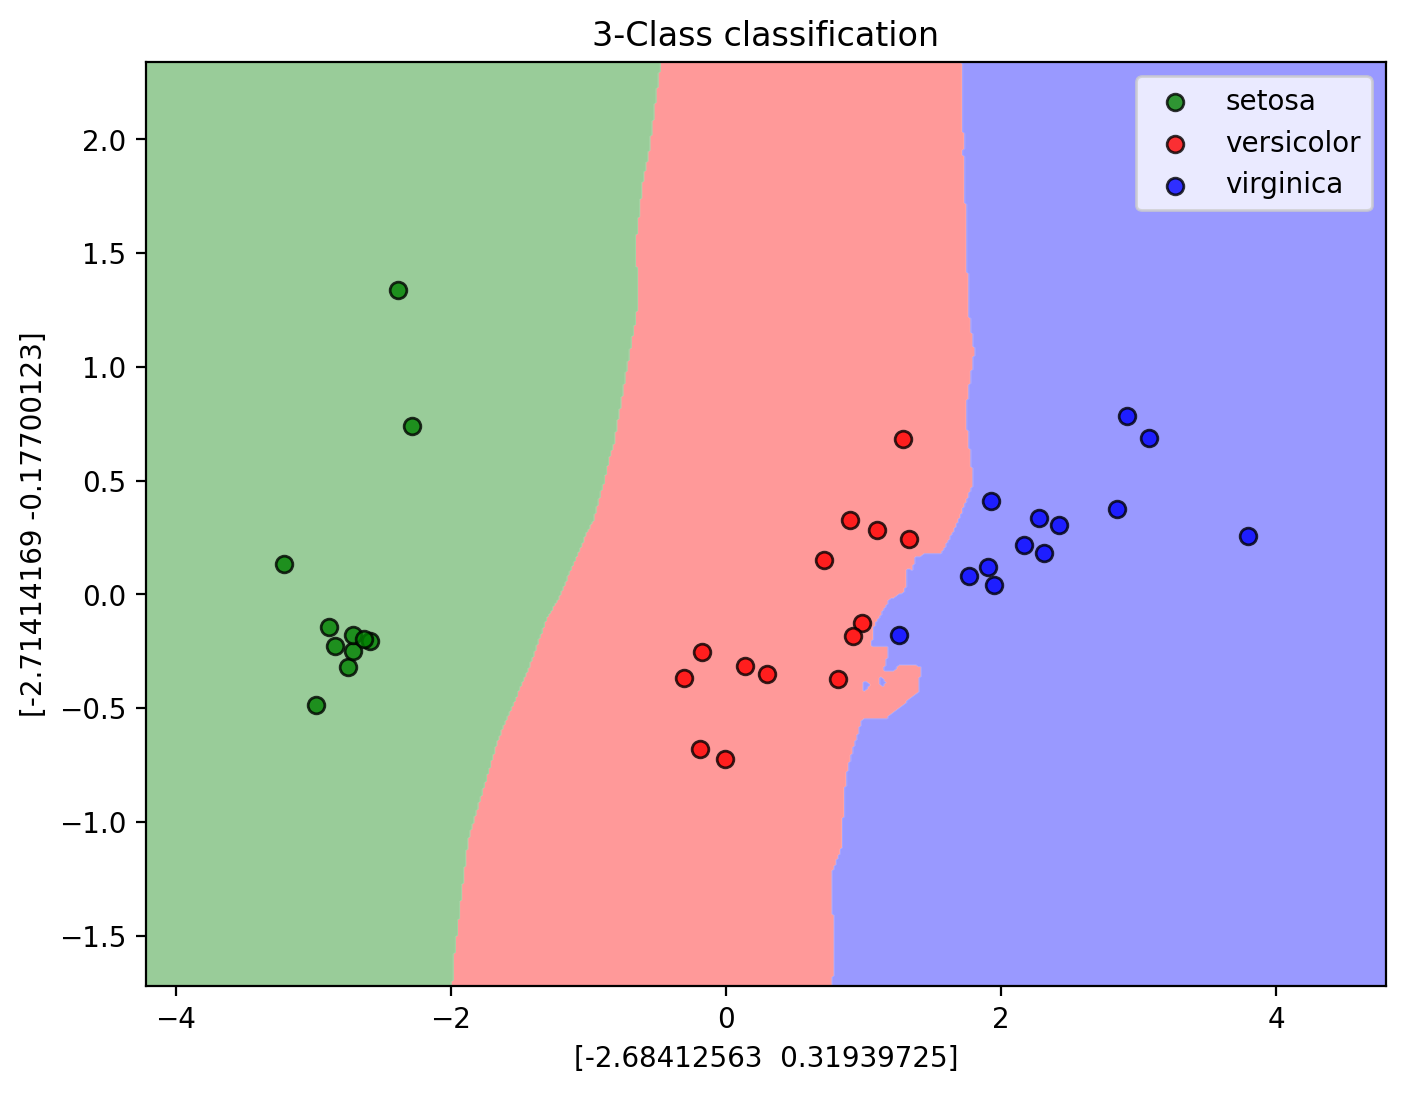

In [66]:
# apply pca to all the 4 descriptors of the iris dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d_pca = pca.fit_transform(iris.data)
#apply knn on pca transformed data
train_xs_pca, test_xs_pca, train_ys_pca, test_ys_pca = train_test_split(
    features_2d_pca, ys, test_size=0.25, random_state=1427
)
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
model.fit(train_xs_pca, train_ys_pca)
pred_ys = model.predict(test_xs_pca)
plot_decision_boundary(test_xs_pca, model, COLORS)
plot_points(test_xs_pca, test_ys_pca, features_2d_pca, target_names, COLORS)
#compare the results of knn on original 2d features vs pca transformed features
cm_pca = metrics.confusion_matrix(test_ys_pca, pred_ys)
print("Confusion Matrix (PCA transformed features):\n", cm_pca)
accuracy = np.trace(cm_pca) / np.sum(cm_pca)
print(f"Accuracy (from confusion matrix, PCA features): {accuracy * 100:.2f}%")

---

In [69]:
#compare accuracy with previous model
# cm_original = metrics.confusion_matrix(test_ys, pred_ys)
print("Confusion Matrix (Original 2D features):\n", cm)
accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy (from confusion matrix, Original 2D features): {accuracy * 100:.2f}%")

print("Confusion Matrix (Original 2D features):\n", cm_pca)
accuracy = np.trace(cm_pca) / np.sum(cm_pca)
print(f"Accuracy (from confusion matrix, Original 2D features): {accuracy * 100:.2f}%")


Confusion Matrix (Original 2D features):
 [[11  0  0]
 [ 0  9  5]
 [ 0  5  8]]
Accuracy (from confusion matrix, Original 2D features): 73.68%
Confusion Matrix (Original 2D features):
 [[11  0  0]
 [ 0 14  0]
 [ 0  0 13]]
Accuracy (from confusion matrix, Original 2D features): 100.00%
